<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/Housinginformationanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
#Problem 1: Obtaining a dataset
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Problem 2: Investigating the dataset itself

The dataset contains 79 predictor variables, which explain different attributes of residential houses in Ames, Iowa.

The main goal is to estimate the final selling price of every house given the features offered. The variable to be predicted is "SalePrice." Some of the features of the dataset include MSSubClass which is the type of dwelling given as a numeric code, LotFrontage which is the linear ft of street connected to the property, Neighborhood which is the physical location of the house within the city of Ames and is a categorical variable and GarageArea which is the size of the garage in square ft.

The numeric target column is the "SalePrice" which represents the actual sale price of the properties.

In [13]:
#Problem 3: Checking the data
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# See what each feature is about
print("Shape:", df.shape)
df.info()
print("\n")

#Check which column is the target variable this time
target = 'SalePrice'
print(df['SalePrice'])
print("\n")

#Display the mean, standard deviation, and quartiles of the feature values at once
df.describe()

Shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
#Problem 4: Dealing with missing values
#Checking for missing values for each feature and the percentage of missing values.
missing_values = df.isnull().sum()
missing = missing_values[missing_values > 0].sort_values(ascending=False)
missing_df = pd.DataFrame({
    'Total': missing,
    'Missing Ratio': missing / len(df)
})
missing_df


,Total,Missing Ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


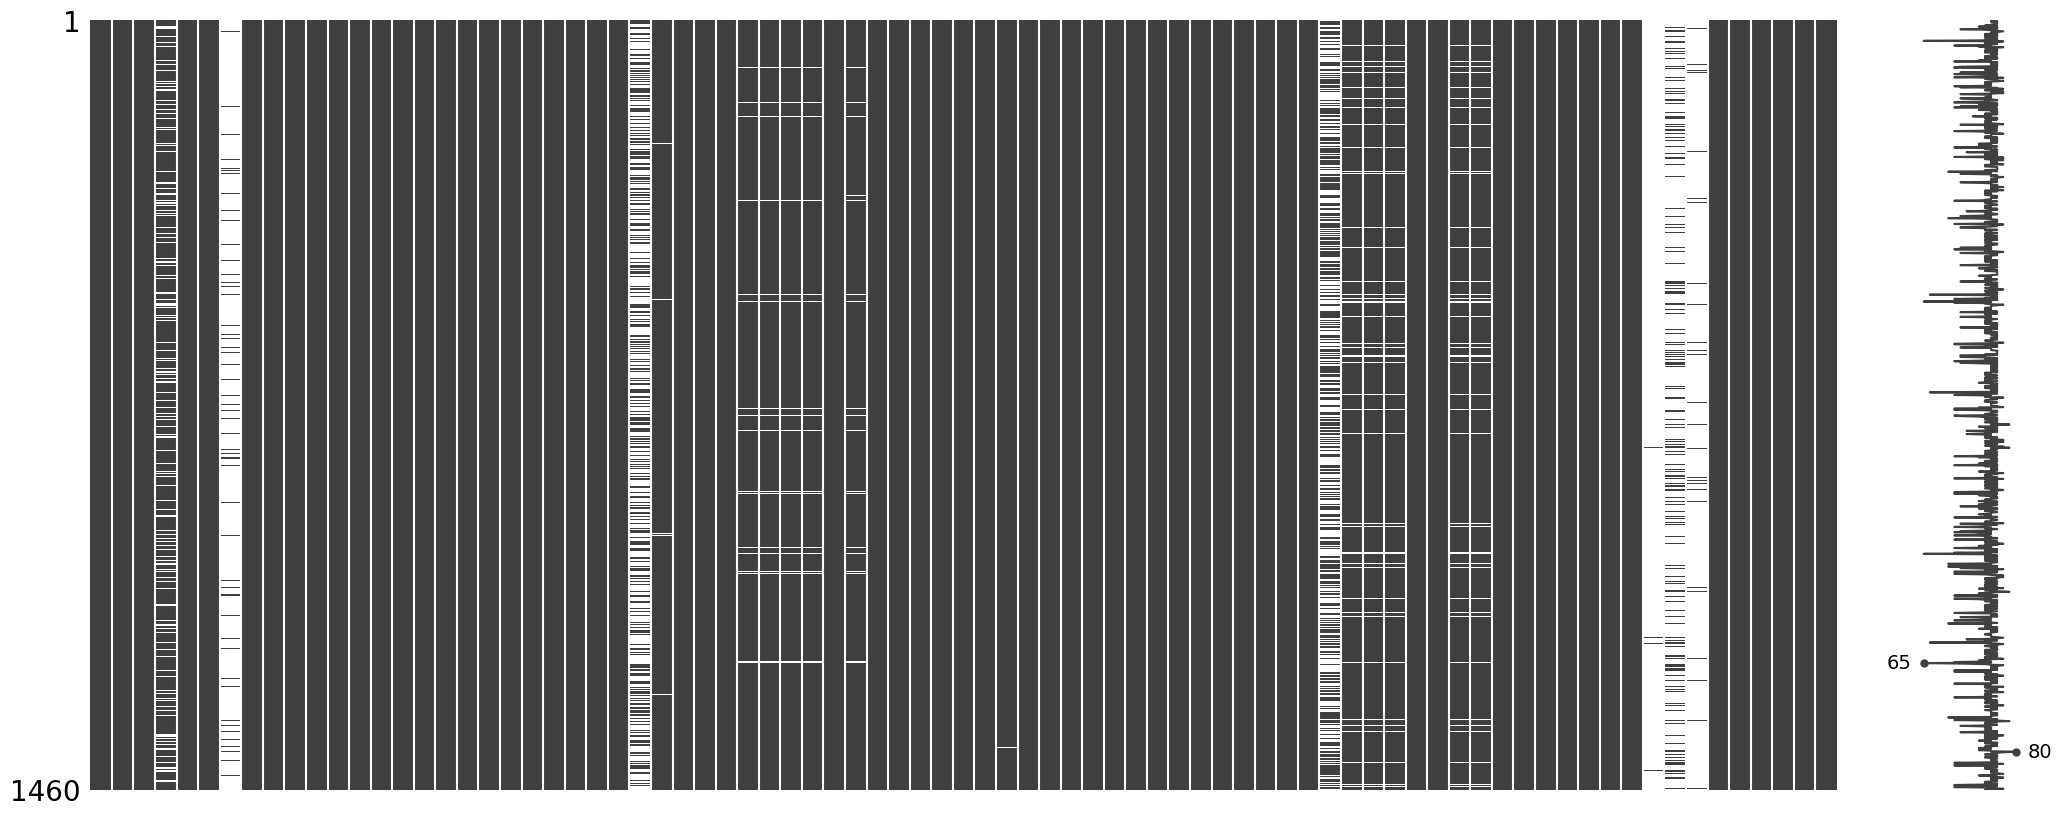

In [23]:
#Visualizing with missingno
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [25]:
#Deleting features (columns) that have 5 or more missing values.
threshold = 5
cols_to_drop = missing_df[missing_df['Total'] >= threshold].index
df_reduced = df.drop(columns=cols_to_drop)

# Step 4: Drop rows with remaining missing values
df_clean = df_reduced.dropna()
print("Shape after cleaning:", df_clean.shape)

Shape after cleaning: (1459, 63)


#Problem 5: Researching terminology

**Kurtosis** is a measure of the tailedness of a distribution; the extent of the data in the tails relative to a normal distribution. High kurtosis (leptokurtic) implies heavy tails and more outliers whereas low kurtosis (platykurtic) imply light tails and fewer outliers. A normal distribution possesses a kurtosis of 3 (usually given as 0, because that is the excess kurtosis). It aids in the evaluation of risk in finance or prevalence of outliers in data.

**Skewness** measures an asymmetry in a distribution. Positive skew implies that the right tail is longer (mean > median), as is typical of income data. Negative skew extends further on the left (mean < median) as in age at retirement. A skew of zero would mean symmetry (e.g. normal distribution). It is essential in diagnosis of data bias and transformations (e.g. log for positive skew).

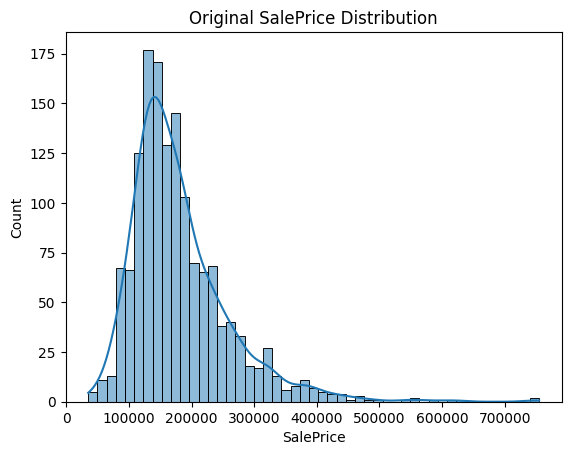

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [26]:
#Problem 6: Confirming distribution
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Original distribution
sns.histplot(df[target], kde=True)
plt.title('Original SalePrice Distribution')
plt.show()

print("Skewness:", df[target].skew())
print("Kurtosis:", df[target].kurt())


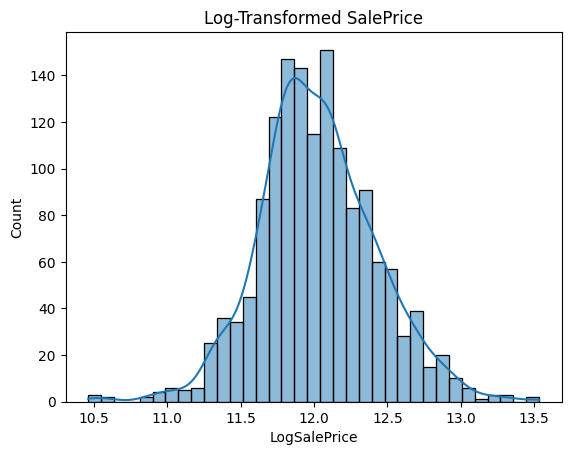

Skewness (log): 0.12134661989685333
Kurtosis (log): 0.809519155707878


In [28]:
#Performing a logarithmic transformation on the objective variable.
df['LogSalePrice'] = np.log1p(df[target])  # log(1 + x) to handle 0s safely

sns.histplot(df['LogSalePrice'], kde=True)
plt.title('Log-Transformed SalePrice')
plt.show()

print("Skewness (log):", df['LogSalePrice'].skew())
print("Kurtosis (log):", df['LogSalePrice'].kurt())

#Explaining the change before and after logarithmic transformation
The initial distribution of the target variable, SalePrice, is skewed to the right, i. e. most of the house prices are concentrated on the left side with the long tail on the right. It reveals that this data is not normally distributed, which may have an adverse effect on the accuracy of models such as the linear regression whose input is expected to be normally distributed. Taking the logarithmic transformation of the variable SalePrice is aimed at normalizing the distribution by compressing the values that are high and dispersing those that are low. This has the effect of making the resulting distribution more symmetric, or lesser skewness and kurtosis. This transformation brings the data closer to the normal distribution, which, respectively, can increase the accuracy and reliability of the predictive models.



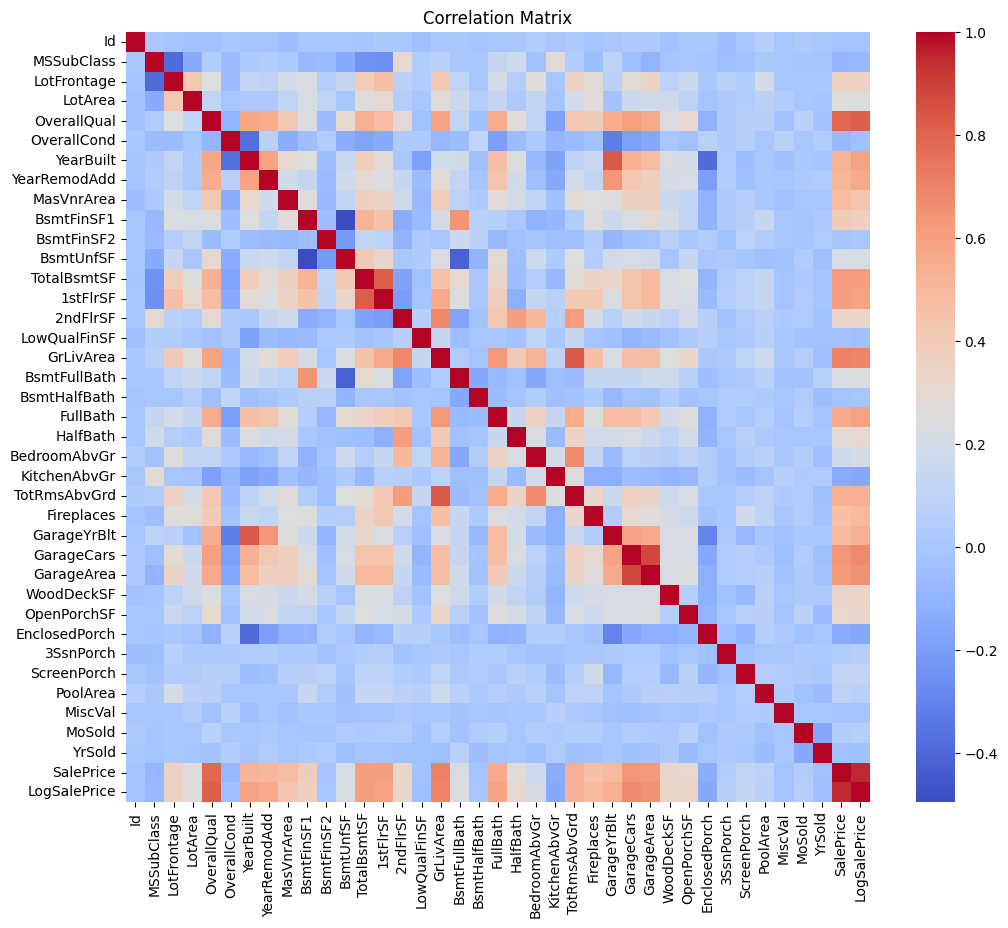

In [29]:
#Problem 7: Confirming the correlation coefficient
#Creating a heat map of the correlation coefficient matrix and find the relationships with high correlation coefficients.
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#Markdown Description
The heat map of the entire correlation matrix gives us the visual impression of the strength of the relationship between every pair of features. The darker the color the higher the correlation. This assists in determining the redundant features or the possible predictors of the target variable. In regression analysis, feature selection, and model performance, high values of correlation are significant.

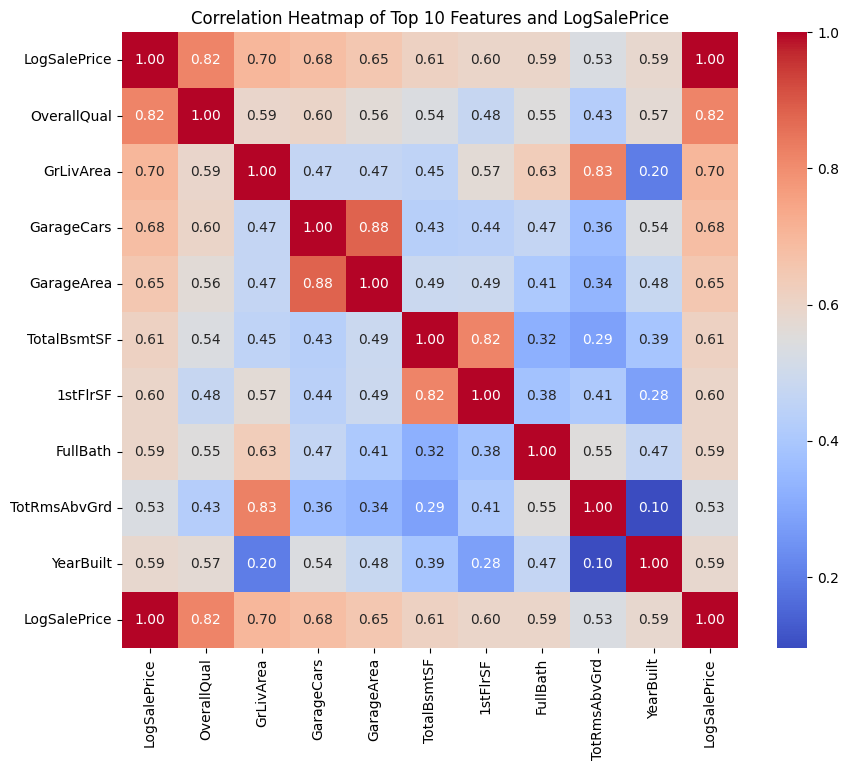

In [37]:
#Selecting 10 features that have a high correlation with the target variable, and createing a correlation coefficient matrix heat map for these
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 10 features plus the target
top_10_corr_features = top_features + ['LogSalePrice']

# Create the correlation matrix
top_corr_matrix = df[top_10_corr_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Heatmap of Top 10 Features and LogSalePrice")
plt.show()


#Markdown Description
We took the 10 features that had the strongest correlation with the target variable, LogSalePrice and plotted the correlation matrix of those features. Other variables such as OverallQual, GrLivArea and GarageCars depicted strong positive correlations. Such visualization allows us to fret down to important predictors and how these significant variables interact with other essential variables in influencing house prices.

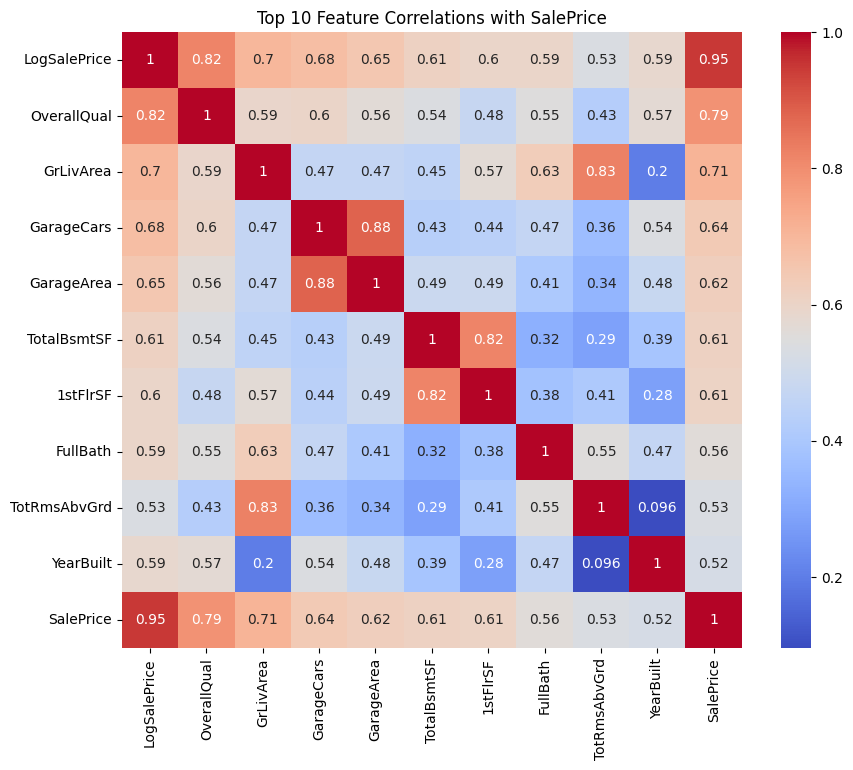

In [32]:
#Summarizeing whether the 10 selected features represent something by referring to the description in Kaggle’s DataDescription.
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Feature Correlations with SalePrice")
plt.show()

#Markdown Description
The 10 features chosen are the fundamental features of the quality and size of the homes like OverallQual, GrLivArea, GarageCars and TotalBsmtSF. As stated in Kaggle Data Description, these variables depict living area, number of rooms, basement size, and garage capacity which are intrinsic factors that determine the value of a home and hence are rational variables to use in predicting the sale price.

In [34]:
#Finding 3 combinations of the 10 selected features that have high correlation coefficients with each other.
# Sort by correlation strength and pick the top 3
top_3_highly_corr_pairs = sorted(highly_corr_pairs, key=lambda x: x[2], reverse=True)[:3]

print("Top 3 highly correlated feature pairs (> 0.7):")
for pair in top_3_highly_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")


Top 3 highly correlated feature pairs (> 0.7):
GarageArea - GarageCars: 0.88
TotRmsAbvGrd - GrLivArea: 0.83
1stFlrSF - TotalBsmtSF: 0.82


#Markdown Description
The three most strongly correlated pairs of features of the top 10 chosen are: GarageArea and GarageCars (0.88), TotRmsAbvGrd and GrLivArea (0.83), and 1stFlrSF and TotalBsmtSF (0.82). These combinations show that there exists multicollinearity since they reflect similar house characteristics. Of these, GarageArea and GarageCars both define the size of the garage; TotalBsmtSF and 1stFlrSF are frequently closely related in one-story houses; and GrLivArea contains TotRmsAbvGrd. When doing predictive modelling, having both the features in these pairs may be redundant and hence dimensionality reduction or feature selection may be needed.